In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # for train test splitting
from sklearn.model_selection import train_test_split  # for decision tree object
from sklearn.tree import DecisionTreeClassifier  # for checking testing results
from sklearn.metrics import classification_report, \
    confusion_matrix  # for visualizing tree
from sklearn.tree import plot_tree

features = pd.read_csv('video_games_sales.csv')
features.head(5)

,sales,comp_price,income,advertising,population,price,branch_loc,age,education,urban,US
0,14.38,136,27,18,453,133,2,33,12,0,1
1,7.09,113,13,18,126,168,1,58,9,1,1
2,6.38,128,72,15,352,104,1,42,11,0,1
3,2.42,183,101,16,470,164,2,44,17,1,0
4,10.02,199,58,15,429,164,2,21,8,0,1


In [80]:
#getting information of dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales        500 non-null    float64
 1   comp_price   500 non-null    int64  
 2   income       500 non-null    int64  
 3   advertising  500 non-null    int64  
 4   population   500 non-null    int64  
 5   price        500 non-null    int64  
 6   branch_loc   500 non-null    int64  
 7   age          500 non-null    int64  
 8   education    500 non-null    int64  
 9   urban        500 non-null    int64  
 10  US           500 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 43.1 KB


In [81]:
print('The shape of our features is:', features.shape)

The shape of our features is: (500, 11)


In [180]:
features.isnull().any()

sales          False
comp_price     False
income         False
advertising    False
population     False
price          False
branch_loc     False
age            False
education      False
urban          False
US             False
dtype: bool

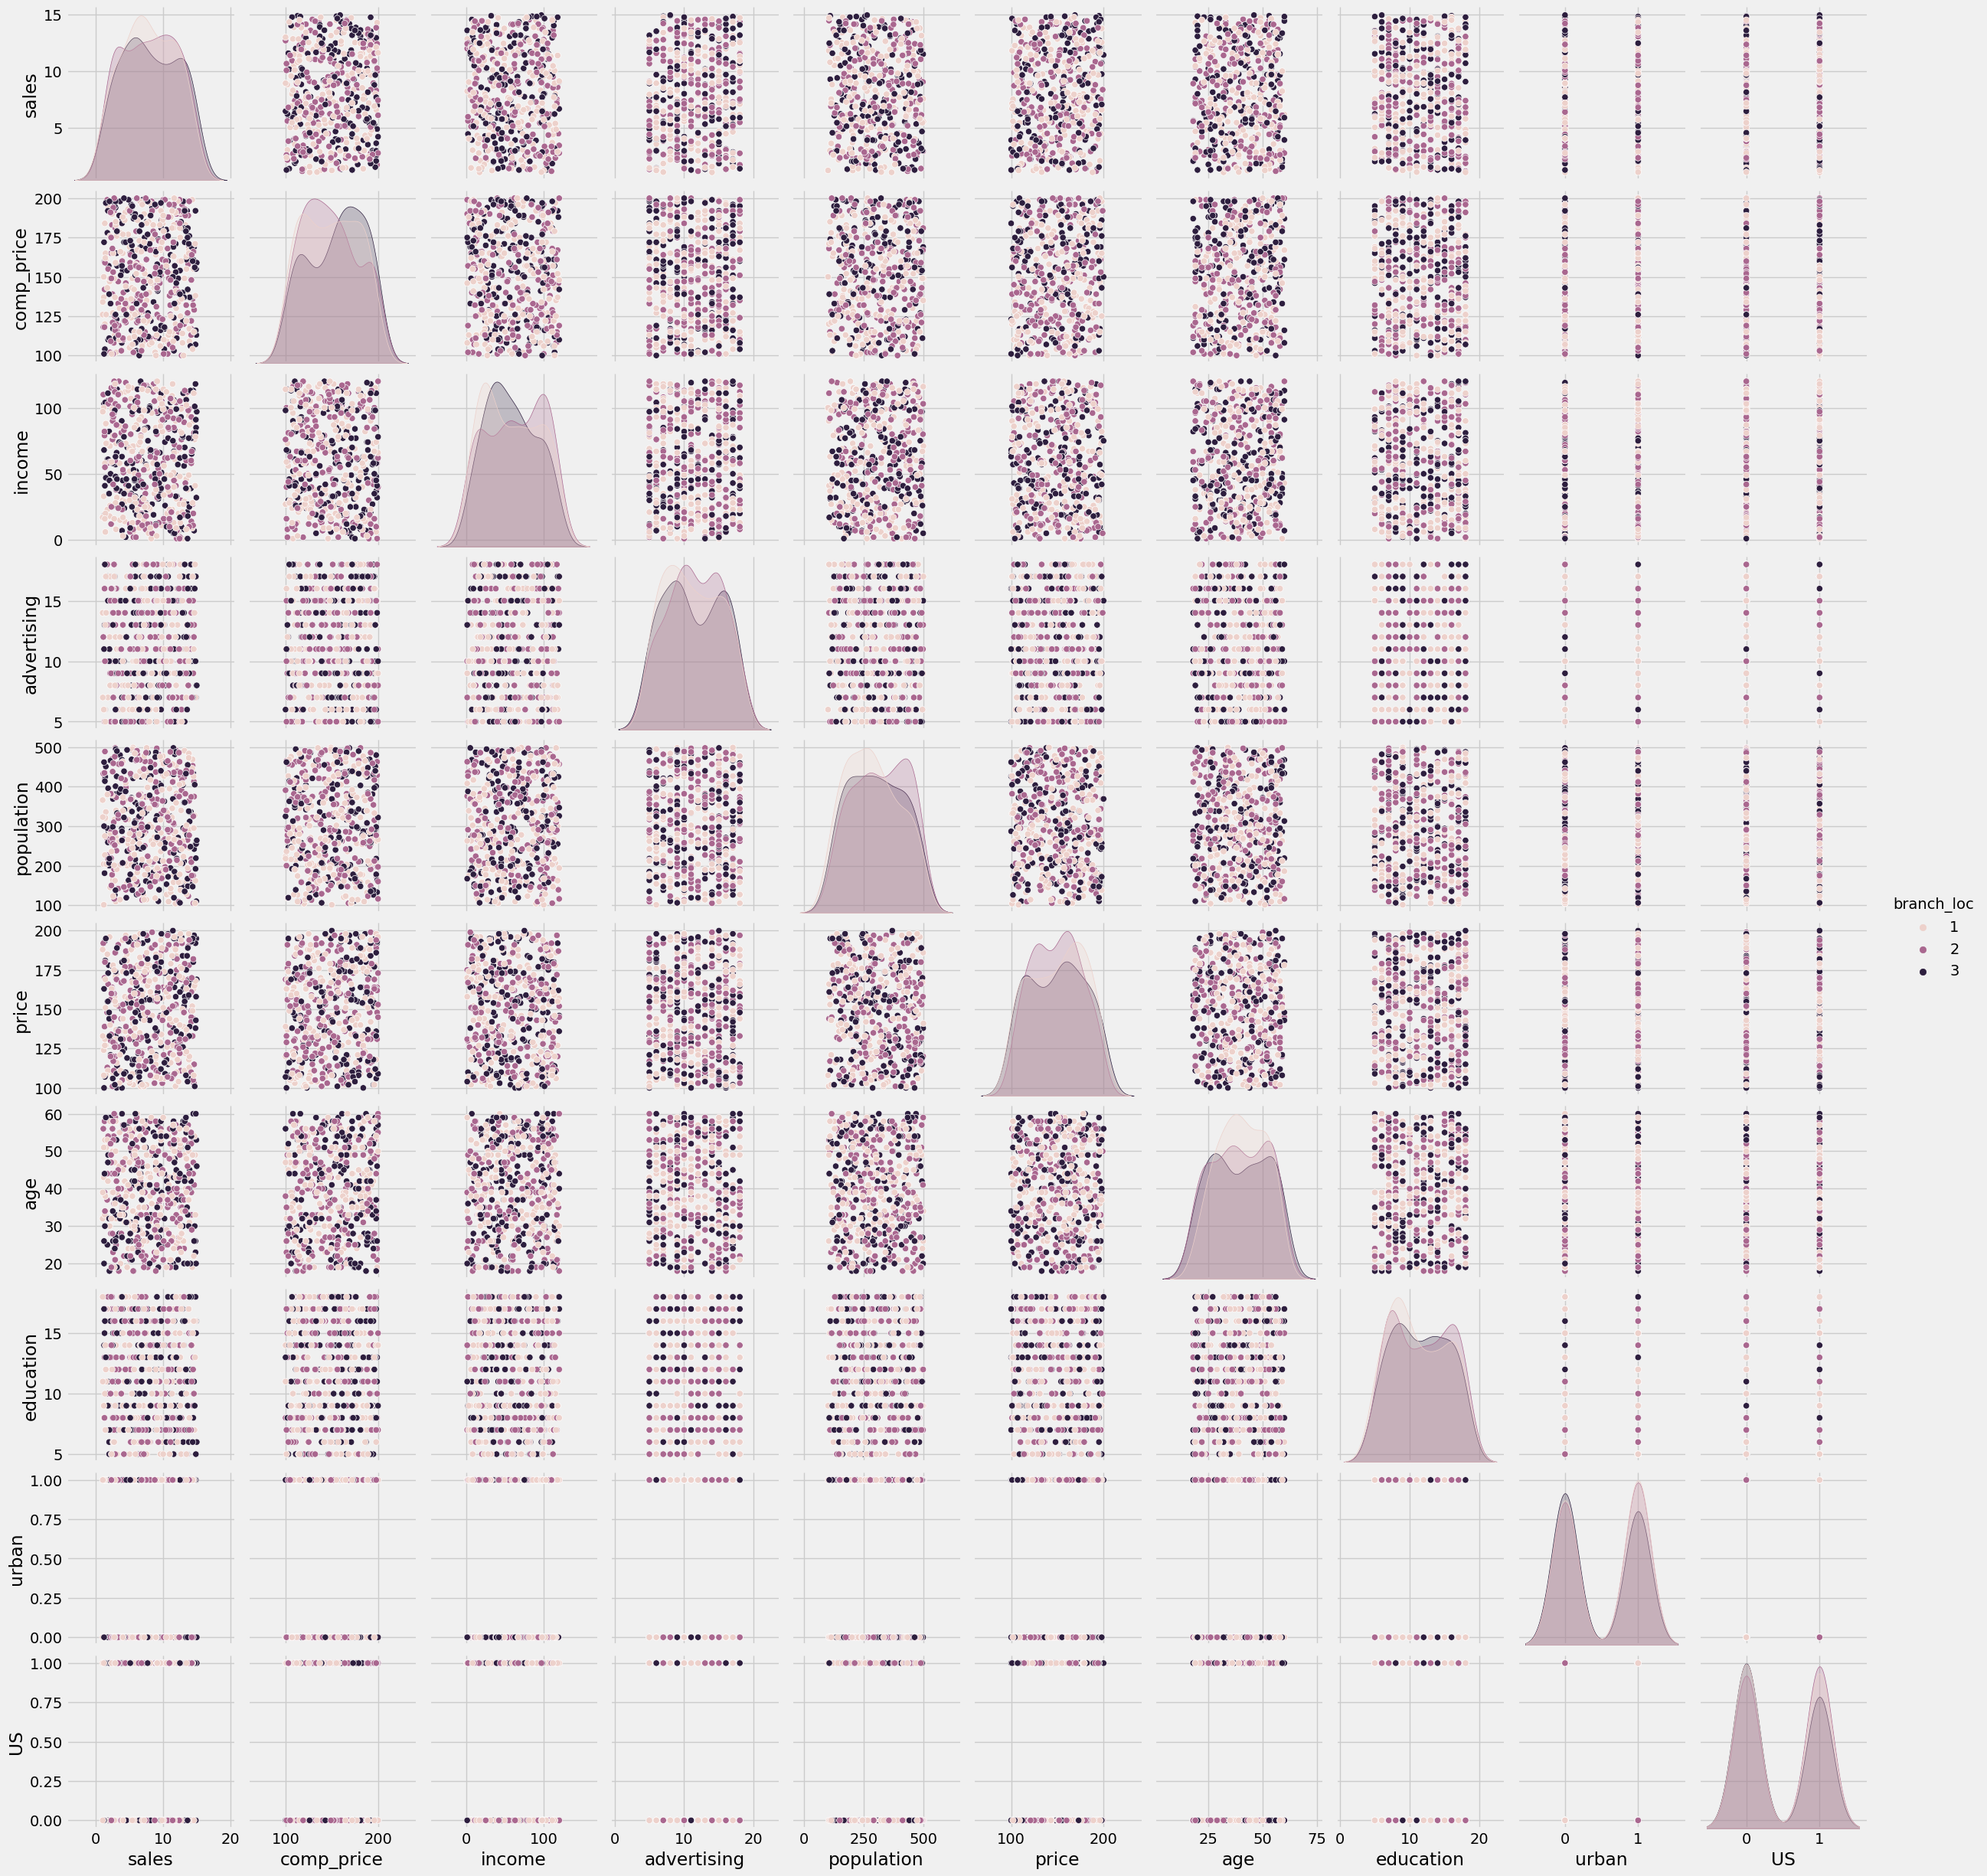

In [83]:
sns.pairplot(data=features, hue = 'branch_loc')

In [84]:
df=pd.get_dummies(features,columns=['urban','US'], drop_first=True)

In [85]:
print(df.head())

   sales  comp_price  income  advertising  population  price  branch_loc  age   
0  14.38         136      27           18         453    133           2   33  \
1   7.09         113      13           18         126    168           1   58   
2   6.38         128      72           15         352    104           1   42   
3   2.42         183     101           16         470    164           2   44   
4  10.02         199      58           15         429    164           2   21   

   education  urban_1   US_1  
0         12    False   True  
1          9     True   True  
2         11    False   True  
3         17     True  False  
4          8    False   True  


In [86]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [87]:
x=df.iloc[:,0:6]
y=df['branch_loc']
x

,sales,comp_price,income,advertising,population,price
0,14.38,136,27,18,453,133
1,7.09,113,13,18,126,168
2,6.38,128,72,15,352,104
3,2.42,183,101,16,470,164
4,10.02,199,58,15,429,164
...,...,...,...,...,...,...
495,8.76,152,42,13,355,133
496,13.46,155,8,11,302,123
497,7.18,172,98,13,114,143
498,11.41,105,63,7,412,152


In [88]:
y

0      2
1      1
2      1
3      2
4      2
      ..
495    2
496    1
497    1
498    2
499    2
Name: branch_loc, Length: 500, dtype: int64

In [89]:
df['branch_loc'].unique()

array([2, 1, 3])

In [90]:
df.branch_loc.value_counts()

branch_loc
1    171
2    169
3    160
Name: count, dtype: int64

In [91]:
colnames = list(df.columns)
colnames

['sales',
 'comp_price',
 'income',
 'advertising',
 'population',
 'price',
 'branch_loc',
 'age',
 'education',
 'urban_1',
 'US_1']

In [92]:
df.describe()

,sales,comp_price,income,advertising,population,price,branch_loc,age,education
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.985440,150.58200,59.654000,11.346000,301.696000,149.578000,1.978000,39.618000,11.468000
std,3.955275,29.53167,34.991243,3.962535,111.776579,28.460497,0.814151,12.134189,4.048921
min,1.040000,100.00000,1.000000,5.000000,101.000000,100.000000,1.000000,18.000000,5.000000
25%,4.765000,124.75000,28.000000,8.000000,206.000000,125.750000,1.000000,30.000000,8.000000
50%,7.780000,151.00000,58.500000,11.000000,295.000000,152.000000,2.000000,40.000000,11.000000
75%,11.520000,175.25000,91.250000,15.000000,396.250000,173.000000,3.000000,51.000000,15.000000
max,14.980000,200.00000,120.000000,18.000000,499.000000,200.000000,3.000000,60.000000,18.000000


In [93]:
df.head()

,sales,comp_price,income,advertising,population,price,branch_loc,age,education,urban_1,US_1
0,14.38,136,27,18,453,133,2,33,12,False,True
1,7.09,113,13,18,126,168,1,58,9,True,True
2,6.38,128,72,15,352,104,1,42,11,False,True
3,2.42,183,101,16,470,164,2,44,17,True,False
4,10.02,199,58,15,429,164,2,21,8,False,True


In [94]:
# Labels are the values we want to predict
labels = np.array(df['income'])
# Remove the labels from the features
# axis 1 refers to the columns
features = df.drop('income', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [95]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [96]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 11)
Training Labels Shape: (375,)
Testing Features Shape: (125, 11)
Testing Labels Shape: (125,)


In [97]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('sales')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  56.99


In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [99]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.18 degrees.


In [100]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: income               Importance: 1.0
Variable: sales                Importance: 0.0
Variable: comp_price           Importance: 0.0
Variable: advertising          Importance: 0.0
Variable: population           Importance: 0.0
Variable: price                Importance: 0.0
Variable: branch_loc           Importance: 0.0
Variable: age                  Importance: 0.0
Variable: education            Importance: 0.0
Variable: urban_1              Importance: 0.0
Variable: US_1                 Importance: 0.0


In [101]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('sales'), feature_list.index('income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.14 degrees.
Accuracy: 99.23 %.


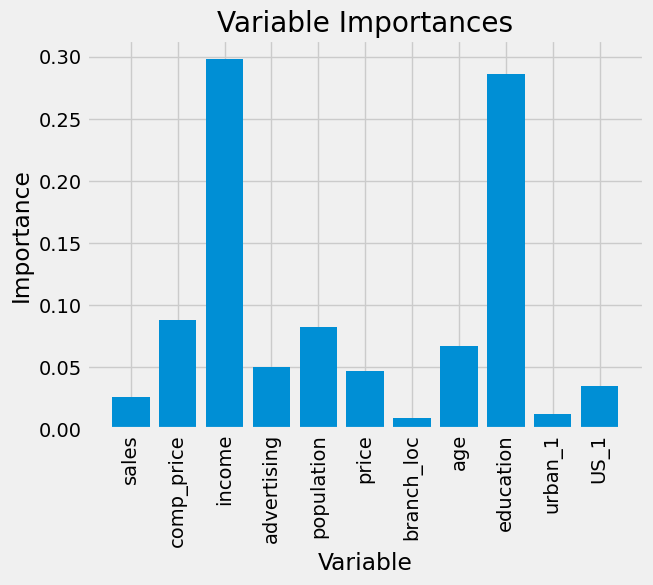

In [133]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');